# Exploratory Data Analysis (EDA)

# Introduction to Exploratory Data Analysis (EDA) on Cryptocurrency News Impact

In this notebook, we embark on an exploratory data analysis (EDA) journey to uncover insights from the `GA_Results.csv` dataset. This dataset, enriched with relevance, sentiment, and strength scores derived from previous analyses, offers a unique opportunity to explore the multifaceted impact of news on the cryptocurrency market. Our goal is to visualize and understand the distribution of news attributes, identify trends over time, analyze correlations between different metrics, and examine the geographical spread of news sources.

## Objective

The primary objectives of this EDA are to:
1. **Visualize Distributions**: Assess the distribution of relevance, sentiment, and strength scores across the news dataset.
2. **Identify Temporal Trends**: Explore how news impact metrics vary over time, providing insights into the dynamics of news influence on cryptocurrency markets.
3. **Analyze Correlations**: Investigate the relationships between relevance, sentiment, strength scores, and real market changes to understand how these variables interact.
4. **Geographical Analysis**: Examine the geographical distribution of news sources to identify regions with the most significant impact on the cryptocurrency market.

## Methodology

Using Python libraries such as Pandas for data manipulation, Matplotlib and Seaborn for visualization, and GeoPandas for geographical analysis, we will:
- Conduct **distribution analysis** to understand the frequency and spread of news attributes.
- Perform **trends analysis** to observe how news metrics change over time and during specific hours of the day.
- Carry out **correlation analysis** to determine the strength and direction of relationships between different news metrics and market reactions.
- Execute **geographical analysis** to visualize the global distribution of news sources and their average impact metrics.

## Visualizations

Key visualizations in this analysis include:
- Count plots and histograms to visualize the distribution of news metrics.
- Time series plots to track changes in news impact over time.
- Heatmaps to reveal correlations between different variables.
- Geographical maps to display the distribution of news sources and their impact worldwide.

## Insights and Implications

Through this EDA, we aim to derive actionable insights that can inform market participants, analysts, and researchers about the nuances of news impact on cryptocurrency markets. By understanding the temporal and geographical nuances of news dissemination and its influence, stakeholders can better navigate the volatile cryptocurrency landscape.

## Conclusion

This notebook serves as a foundational step towards a comprehensive understanding of the interplay between news and cryptocurrency market dynamics. By systematically exploring and visualizing the enriched dataset, we pave the way for deeper analyses, including predictive modeling and sentiment analysis, to further elucidate the power of news in shaping market trends.


In [18]:
## Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [19]:
df = pd.read_csv('GA_Results.csv')

In [20]:
df.head()

,seendate,title,lemmetized_titles,sourcecountry,language,relevance_class,sentiment_class,strength_score,real_percent_change,relevance_probability,sentiment_negative_probability,sentiment_neutral_probability,sentiment_positive_probability,strength_probability
0,2024-02-18 05:45:00,Man defrauded of Rs 38 lakh by woman he met on...,man defrauded r 38 lakh woman met matrimonial ...,India,English,0.0,0,1,0.008895,0.115892,0.000505,0.998322,0.001172,0.526015
1,2024-02-18 19:45:00,Man defrauded of Rs 38 lakh by woman he met on...,man defrauded r 38 lakh woman met matrimonial ...,India,English,0.0,0,1,0.008895,0.115892,0.000505,0.998322,0.001172,0.526015
2,2024-02-18 12:45:00,Here Why I Might Change My Mind and Buy Nvidia...,might change mind buy nvidia stock,United States,English,0.0,0,1,0.008895,0.083854,0.000321,0.997152,0.002527,0.526015
3,2024-02-18 07:45:00,Cobra AI system launched by North East financi...,cobra ai system launched north east financial ...,United Kingdom,English,0.0,1,1,0.008895,0.219234,0.000168,0.003786,0.996046,0.526015
4,2024-02-18 02:30:00,Crypto fraud alert : Gurugram - based exec mee...,crypto fraud alert gurugram based exec meet wo...,India,English,0.0,-1,1,0.008895,0.416067,0.999199,0.000692,0.000109,0.526015


In [21]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

---
### Distribution analysis

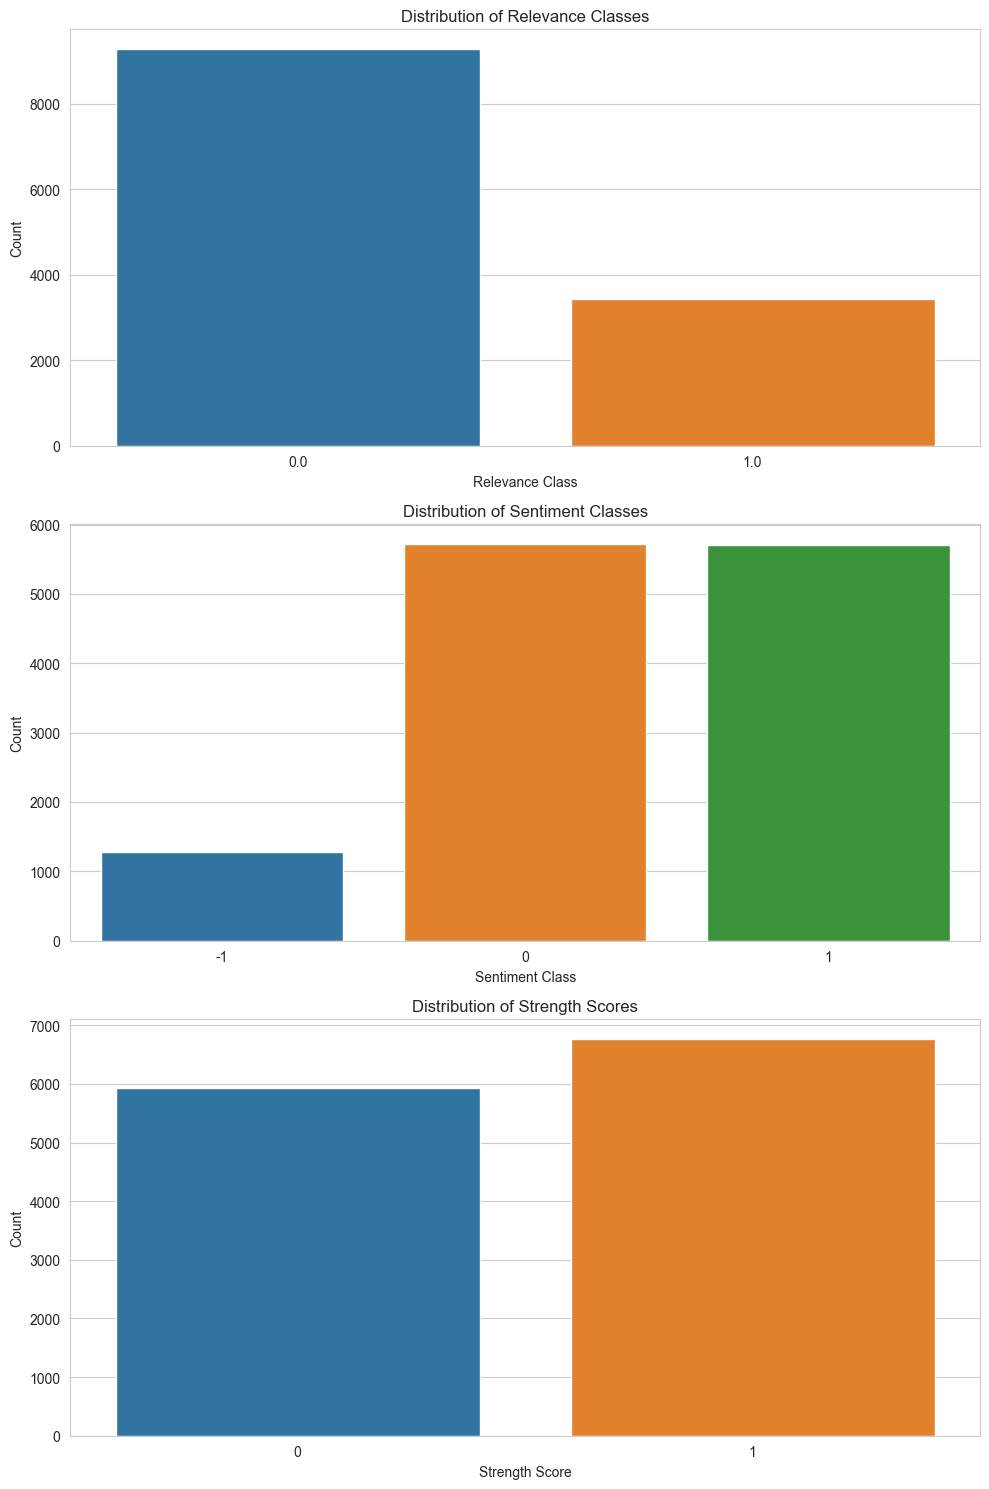

In [22]:
# Initialize a matplotlib figure and axes object
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plotting the distribution of relevance classes
sns.countplot(x='relevance_class', data=df, ax=ax[0])
ax[0].set_title('Distribution of Relevance Classes')
ax[0].set_xlabel('Relevance Class')
ax[0].set_ylabel('Count')

# Plotting the distribution of sentiment classes
sns.countplot(x='sentiment_class', data=df, ax=ax[1])
ax[1].set_title('Distribution of Sentiment Classes')
ax[1].set_xlabel('Sentiment Class')
ax[1].set_ylabel('Count')

# Plotting the distribution of strength scores
sns.countplot(x='strength_score', data=df, ax=ax[2])
ax[2].set_title('Distribution of Strength Scores')
ax[2].set_xlabel('Strength Score')
ax[2].set_ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

---
### Trends over time

In [23]:
df['seendate'] = pd.to_datetime(df['seendate'])

# Setting 'seendate' as the index if you want to resample directly on the DataFrame
df.set_index('seendate', inplace=True)

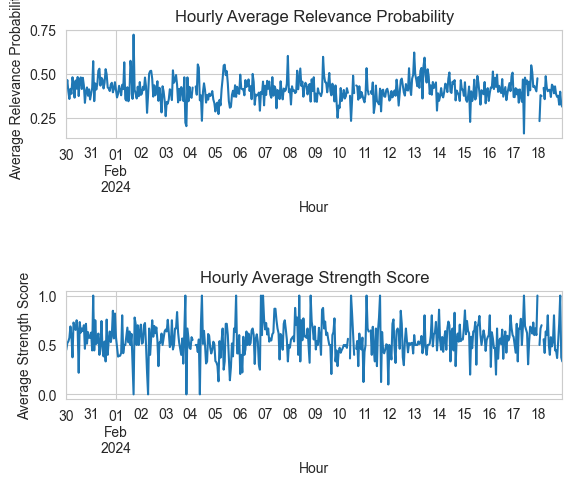

<Figure size 1800x600 with 0 Axes>

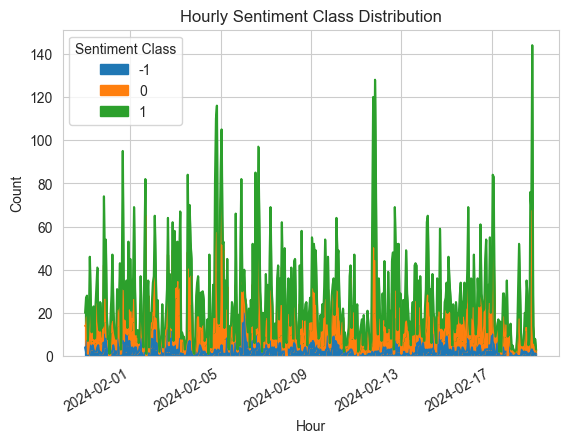

In [24]:
# Hourly Average Relevance Probability
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
df['relevance_probability'].resample('H').mean().plot()
plt.title('Hourly Average Relevance Probability')
plt.xlabel('Hour')
plt.ylabel('Average Relevance Probability')

# Hourly Average Strength Score
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
df['strength_score'].resample('H').mean().plot()
plt.title('Hourly Average Strength Score')
plt.xlabel('Hour')
plt.ylabel('Average Strength Score')

#plt.tight_layout()
plt.show()


# Resample the dataset to hourly frequency and count sentiment classes for each hour
hourly_sentiment_distribution = df.groupby([pd.Grouper(freq='H'), 'sentiment_class']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(18, 6))
hourly_sentiment_distribution.plot(kind='area', stacked=True)
plt.title('Hourly Sentiment Class Distribution')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Sentiment Class')
plt.show()

---
### Correlations analysis

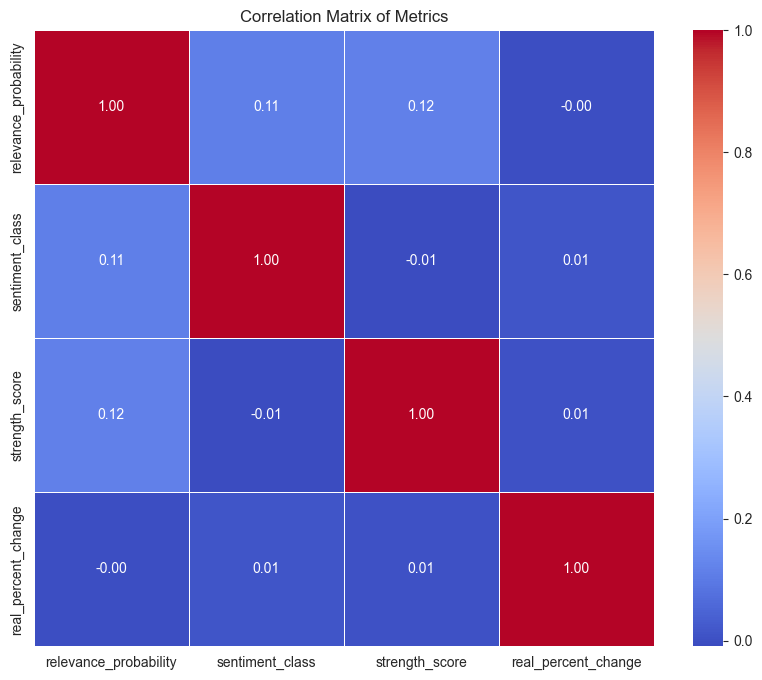

In [25]:
# Calculate the correlation matrix
correlation_matrix = df[['relevance_probability', 'sentiment_class', 'strength_score', 'real_percent_change']].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Metrics')
plt.show()

---
### Geographical Analysis

In [26]:
# Group by 'sourcecountry' and calculate mean relevance_probability, mean sentiment_class, and count of articles
country_metrics = df.groupby('sourcecountry').agg(
    average_relevance_class=('relevance_class', 'mean'),
    average_sentiment_class=('sentiment_class', 'mean'),
    article_count=('title', 'count')
).reset_index()


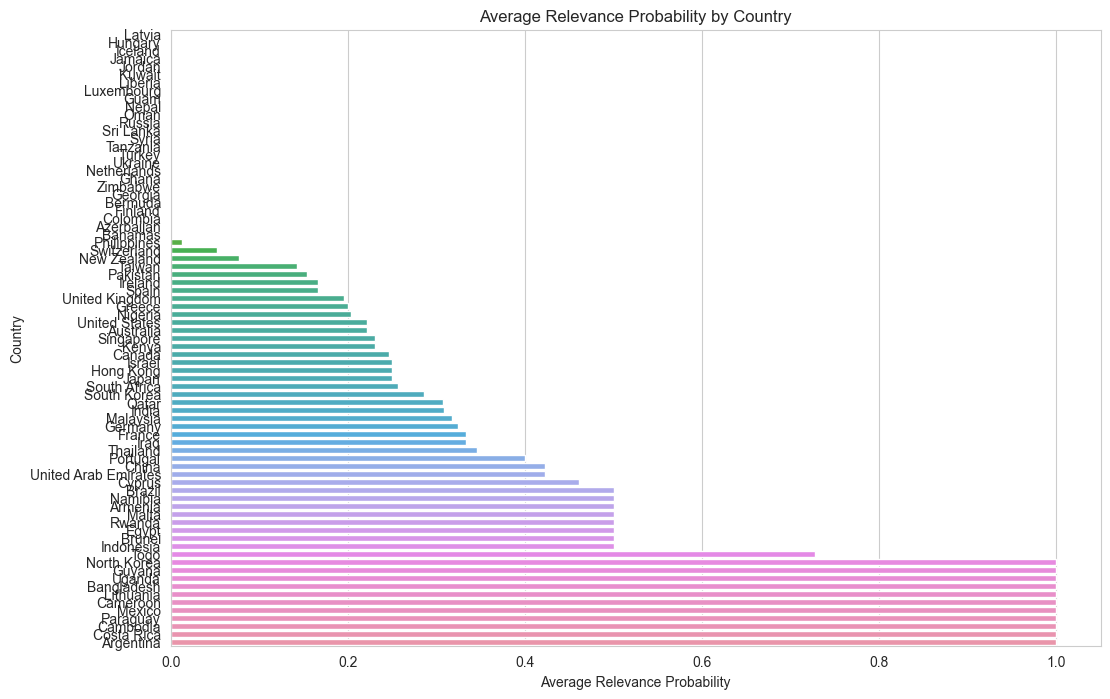

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(x='average_relevance_class', y='sourcecountry', data=country_metrics.sort_values('average_relevance_class', ascending=True))
plt.title('Average Relevance Probability by Country')
plt.xlabel('Average Relevance Probability')
plt.ylabel('Country')
plt.show()

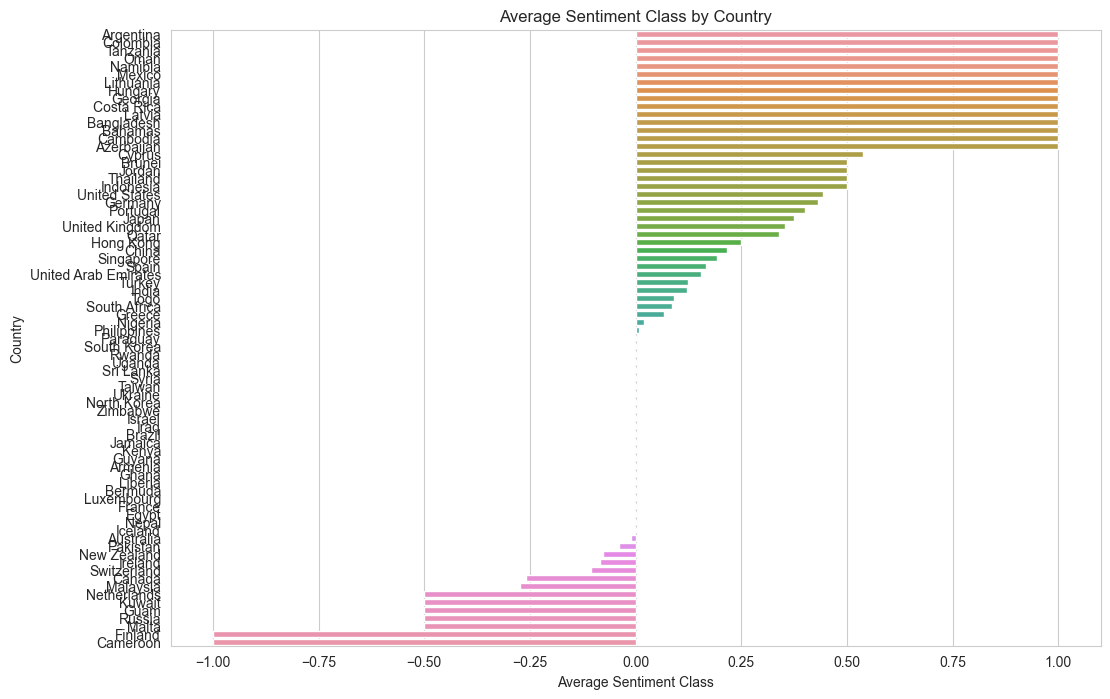

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(x='average_sentiment_class', y='sourcecountry', data=country_metrics.sort_values('average_sentiment_class', ascending=False))
plt.title('Average Sentiment Class by Country')
plt.xlabel('Average Sentiment Class')
plt.ylabel('Country')
plt.show()


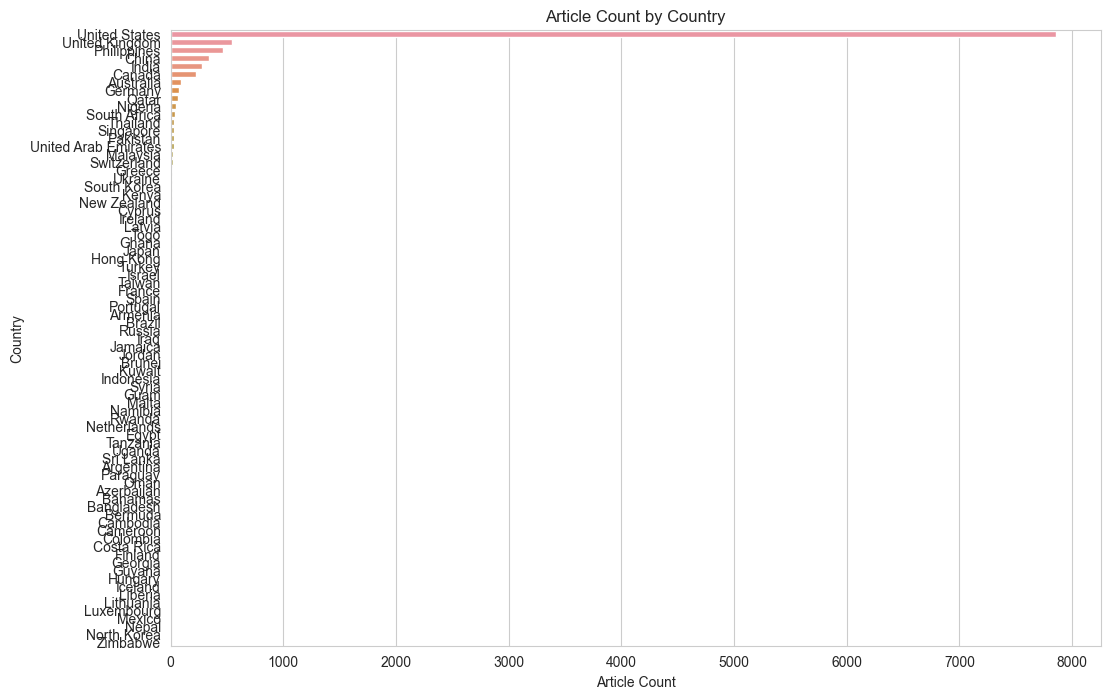

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(x='article_count', y='sourcecountry', data=country_metrics.sort_values('article_count', ascending=False))
plt.title('Article Count by Country')
plt.xlabel('Article Count')
plt.ylabel('Country')
plt.show()

In [30]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/k_/ks4kndx54zz8gqxxbjjq7smc0000gn/T/ipykernel_12580/3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


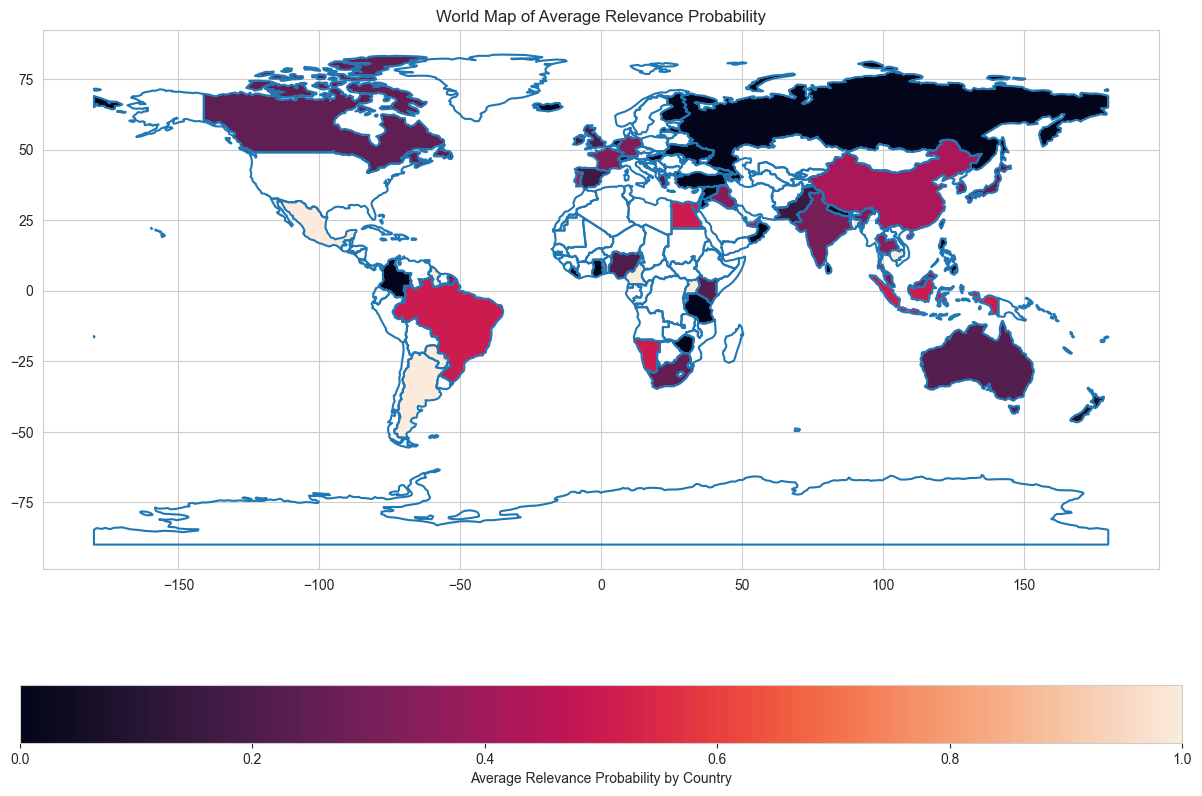

In [34]:
# Merge the GeoDataFrame with your data
world = world.merge(country_metrics, left_on='name', right_on='sourcecountry', how='left')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='average_relevance_class_y', ax=ax, legend=True,
           legend_kwds={'label': "Average Relevance Probability by Country",
                        'orientation': "horizontal"})
plt.title('World Map of Average Relevance Probability')
plt.show()
